In [1]:
## System
import sys
import os
from collections import defaultdict
import math

## Pandas
import pandas as pd
import numpy as np

## Plotting 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Fig utils 
from fig_utils import get_normalized_matrix_per_label


In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/michaelcormier/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
## Substituion matrix file path
autosome_subt_matrix = "../data/ConSplice.substitution_matrix.autosome.txt"

In [3]:
## Read in subt matrix into pandas data frame
subt_counts = pd.read_csv(autosome_subt_matrix, sep = "\t", header = 5, index_col = False).rename(columns = {"#ref":"ref"})

In [4]:
## Get by SpliceAI score range and by reference allele counts
by_ref_counts = subt_counts.groupby(["delta_score_bin","ref"]).agg({"zerotons":sum, "non_zerotons":sum}).reset_index()
by_ref_counts["total"] = by_ref_counts.zerotons + by_ref_counts.non_zerotons

by_bin_totals = by_ref_counts.groupby("delta_score_bin").total.sum().reset_index()
total_overall = by_bin_totals.total.sum()

by_bin_totals["propotion"] = by_bin_totals.apply(lambda x: x.total / total_overall, axis = 1)

In [5]:
power_sites_by_size_df = pd.DataFrame([[i,(i - (i * by_bin_totals.loc[by_bin_totals.delta_score_bin == "0.0-0.01"].propotion.values[0]))] for i in np.arange(2000,0,-2.5)],
                                   columns = ["range_size","power_sites"])
    

In [6]:
subset_power_sites_by_size_df = pd.DataFrame([[i,(i - (i * by_bin_totals.loc[by_bin_totals.delta_score_bin == "0.0-0.01"].propotion.values[0]))] for i in [50,100,200,400,500,800,1000,1500,2000]],
                                   columns = ["range_size","power_sites"])

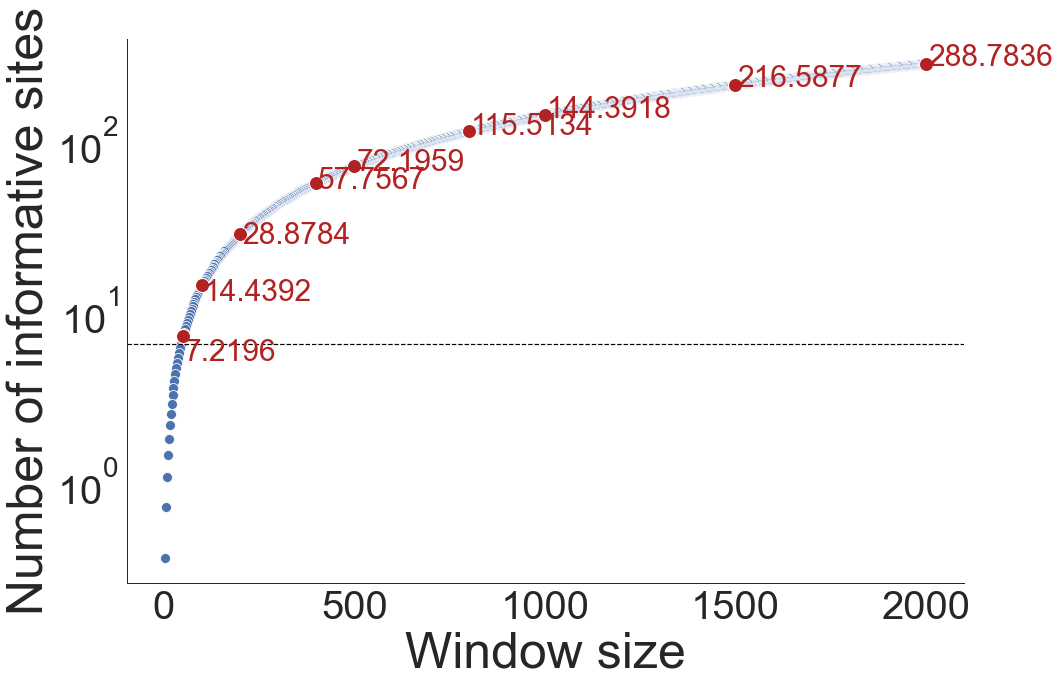

In [8]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(figsize = (15,10))
sns.set(font='Arial', style = "white")
sns.set_context("paper", font_scale = 2)
sns.despine()



sns.scatterplot(x = "range_size", y = "power_sites", data = power_sites_by_size_df, s = 100)

sns.scatterplot(x = "range_size", y = "power_sites", data = subset_power_sites_by_size_df, s = 200, color = "firebrick")

for i,row in subset_power_sites_by_size_df.iterrows():
    
    plt.text(row.range_size + 5, row.power_sites - (math.log(row.power_sites)), "%.4f" %row.power_sites, color = "firebrick", fontsize = 30)


plt.axhline(y = 6.5415, color = "black", linestyle = "--")
    
ax.set_ylabel("Number of informative sites", fontsize = 50)

ax.set_xlabel("Window size", fontsize = 50)


ax.set_yscale("log")

ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)

plt.savefig('../figures/suppl_figure7.svg')